<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Car%20price/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/shubh0799/churn-modelling

# **Загрузка данных**

In [ ]:
! gdown --id 1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ
To: /content/churn-modeling.zip
100% 268k/268k [00:00<00:00, 85.6MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/churn-modeling.zip')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Анализ данных**

In [ ]:
len(df)

10000

In [ ]:
df.isna().mean()

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
df['Exited'].mean()

np.float64(0.2037)

# **Обучающая, тестовая и валидационная выборка**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['Exited'])

In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['Exited'])

In [ ]:
df['Exited'].mean()

np.float64(0.2037)

In [ ]:
train['Exited'].mean()

np.float64(0.20366666666666666)

In [ ]:
val['Exited'].mean()

np.float64(0.204)

In [ ]:
test['Exited'].mean()

np.float64(0.2035)

# **Phik**

In [ ]:
train_full = pd.concat([train,val])

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [ ]:
! pip install phik

In [ ]:
import phik

In [ ]:
phik_owerview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [ ]:
phik_owerview['Exited'].sort_values(ascending=False)

,Exited
Exited,1.000000
NumOfProducts,0.564969
Age,0.498241
IsActiveMember,0.237244
Balance,0.167823
Gender,0.165231
CreditScore,0.123343
Geography,0.104047
CustomerId,0.035798
Tenure,0.033611


# **Человеческое обучение**

In [ ]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [ ]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [ ]:
model

,NumOfProducts,Exited
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [ ]:
model = model.rename({'Exited':'score_prod'},axis=1)

In [ ]:
model

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [ ]:
train_full = train_full.merge(model,how='left',on='NumOfProducts')

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


In [ ]:
train_full.groupby('score_prod')['Exited'].agg(['count', 'mean'])

,count,mean
score_prod,,
0.077049,3673,0.077049
0.275369,4060,0.275369
0.826484,219,0.826484
1.000000,48,1.000000


# **Baseline**

In [ ]:
train_full['score_mean'] = train_full['Exited'].mean()

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(train_full['Exited'],train_full['score_mean'])

0.5055572860042145

In [ ]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359616823203511

# **Uplift**



In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [ ]:
train_full['Exited'].mean()

np.float64(0.20375)

In [ ]:
train_full['Exited'].sample(frac=0.5,random_state=42).mean()

np.float64(0.20675)

In [ ]:
exited_all = train_full['Exited'].sum()

In [ ]:
exited_all

np.int64(1630)

In [ ]:
train_full['Exited'].sample(frac=0.2,random_state=42).sum()

np.int64(337)

In [ ]:
train_full['Exited'].sample(frac=0.2,random_state=42).sum() / exited_all

np.float64(0.2067484662576687)

In [ ]:
train_full = train_full.sort_values('score_prod',ascending=False)

In [ ]:
round(len(train_full) * 0.2)

1600

In [ ]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all

np.float64(0.37055214723926383)

In [ ]:

0.3588957055214724 / 0.2067484662576687

1.7359050445103856

# **Добавим шум**

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
np.random.uniform(0,0.001,size=len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [ ]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0,0.001,size=len(train_full))

In [ ]:
train_full['score_prod'].nunique()

8000

# **Функция для Uplift**

In [ ]:
exited_all = train_full['Exited'].sum()

In [ ]:
exited_all

np.int64(1630)

In [ ]:
train_full = train_full.sort_values('score_prod',ascending=False)

In [ ]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all


np.float64(0.36871165644171777)

In [ ]:
0.36871165644171777 / 0.2

1.8435582822085887

In [ ]:
def uplift(df,score,pct):
  exited_all = df['Exited'].sum()
  df = df.sort_values(score,ascending=False)
  exited_found = df.head(round(len(df) * pct))['Exited'].sum()

  return exited_found / (exited_all *  pct )


In [ ]:
uplift(train_full,'score_prod',0.2)

np.float64(1.843558282208589)

In [ ]:
test = test.merge(model,how='left',on='NumOfProducts')

In [ ]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0,0.001,len(test))

In [ ]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359493168066671

In [ ]:
log_loss(test['Exited'],test['score_prod'])

0.4338658337619006

In [ ]:
uplift(test,'score_prod',0.2)

np.float64(1.8427518427518426)

# **Добавим возраст**

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

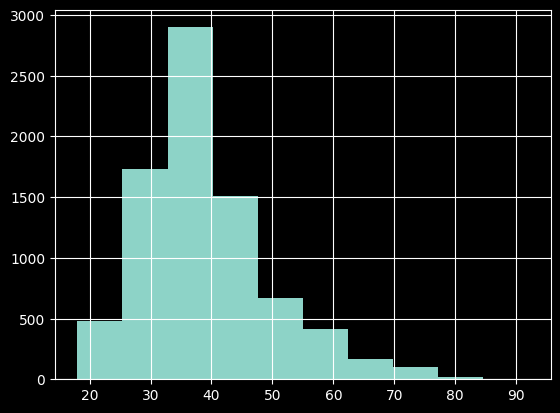

In [ ]:
train_full['Age'].hist();

In [ ]:
pd.qcut(train_full['Age'],5,retbins=True,labels=False)

(568     3
 4564    4
 7344    3
 4754    4
 7847    4
        ..
 3183    0
 603     4
 6739    0
 2609    1
 2222    4
 Name: Age, Length: 8000, dtype: int64,
 array([18., 31., 35., 40., 46., 92.]))

In [ ]:
train_full['age_group'] = pd.cut(train_full['Age'],[0,31,35,40,46,float('inf')])

In [ ]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

<ipython-input-413-aa505e31857f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_full.groupby('age_group')['Exited'].agg(['count','mean'])


,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [ ]:
model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()

<ipython-input-414-cf11bf8a90e9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()


In [ ]:
model = model.rename({'Exited':'score_prod_age'},axis=1)

In [ ]:
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [ ]:
train_full = train_full.merge(model,how='left',on=['NumOfProducts','age_group'])

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,5701,15812888,Perreault,447,France,Male,41,3,0.00,4,1,1,197490.39,1,0.999979,0.20375,"(40.0, 46.0]",1.000000
1,6280,15608338,Chiemenam,757,Spain,Female,55,9,117294.12,4,1,0,94187.47,1,0.999966,0.20375,"(46.0, inf]",1.000000
2,9256,15622033,Rapuluchukwu,847,Germany,Female,41,3,101543.51,4,1,0,16025.17,1,0.999954,0.20375,"(40.0, 46.0]",1.000000
3,9324,15815316,Kennedy,644,France,Male,50,9,76817.00,4,1,0,196371.13,1,0.999942,0.20375,"(46.0, inf]",1.000000
4,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999935,0.20375,"(46.0, inf]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9290,15676810,Jen,561,France,Female,31,1,81480.27,2,1,1,65234.60,0,0.076050,0.20375,"(0.0, 31.0]",0.029293
7996,8606,15748920,Cherkasova,561,France,Female,49,8,0.00,2,1,1,12513.07,0,0.076050,0.20375,"(46.0, inf]",0.225869
7997,7860,15646374,Wynne,766,Germany,Female,28,3,62717.84,2,1,1,13182.43,0,0.076050,0.20375,"(0.0, 31.0]",0.029293
7998,3855,15580935,Okechukwu,687,Germany,Male,33,9,135962.40,2,1,0,121747.96,0,0.076049,0.20375,"(31.0, 35.0]",0.031206


In [ ]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359493168066671

In [ ]:
uplift(train_full,'score_prod',0.2)

np.float64(1.843558282208589)

In [ ]:
log_loss(train_full['Exited'],train_full['score_prod_age'])

0.3866695862492173

In [ ]:
uplift(train_full,'score_prod_age',0.2)

np.float64(2.684049079754601)

In [ ]:
test['age_group'] = pd.cut(test['Age'],[0,31,35,40,46,float('inf')])

In [ ]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group'])

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977


In [ ]:
log_loss(test['Exited'],test['score_prod'])

0.4338658337619006

In [ ]:
uplift(test,'score_prod',0.2)

np.float64(1.8427518427518426)

In [ ]:
log_loss(test['Exited'],test['score_prod_age'])

0.3870707514157596

In [ ]:
uplift(test,'score_prod_age',0.2)

np.float64(2.800982800982801)

# **Добавим IsActiveMember**

In [ ]:
train_full['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,4131
0,3869


In [ ]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [ ]:
model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()

<ipython-input-432-75e2631a8b48>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()


In [ ]:
model

,NumOfProducts,age_group,IsActiveMember,Exited
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [ ]:
model = model.rename({'Exited':'score_prod_age_active'},axis=1)

In [ ]:
train_full = train_full.merge(model,how='left',on=['NumOfProducts','age_group','IsActiveMember'])

In [ ]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group','IsActiveMember'])

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353


In [ ]:
def print_metrics(df,score):
  print(log_loss(df['Exited'],df[score]))
  print(uplift(df,score,0.2))

In [ ]:
print_metrics(train_full,'score_prod_age')

0.3866695862492173
2.684049079754601


In [ ]:
print_metrics(test,'score_prod_age')

0.3870707514157596
2.800982800982801


In [ ]:
print_metrics(train_full,'score_prod_age_active')

0.36550197514510024
2.871165644171779


In [ ]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.8501228501228497


# **Машинное обучение**

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

In [ ]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 49.3ms	remaining: 49.3s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 370ms	remaining: 3.29s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 792ms	remaining: 3.15s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 1.12s	remaining: 2.61s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.53s	remaining: 2.29s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.85s	remaining: 1.84s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 2.29s	remaining: 1.52s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 2.8s	remaining: 1.2s
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 3.59s	remaining: 891ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 4.56s	remaining: 501ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 5.16s	remaining: 0us

bestTest = 0.341

In [ ]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [ ]:
test['score_cat_prod_age_active'].nunique()

254

In [ ]:
len(test)

2000

In [ ]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.8501228501228497


In [ ]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.8746928746928746
